# Data Cleaning in Python — Exercise

**Course:** Intro to Data Mining  
**Dataset:** Heart Failure Prediction dataset (loaded from a public URL — no file downloads needed!)  

---


# YOUR TURN: Practice Exercise

Now apply the same data cleaning pipeline from the Titanic exercise to a **new dataset**: the **Heart Failure Prediction** dataset.

This dataset combines 5 heart disease databases (918 patients total) and contains medical information about patients and whether or not they have heart disease. It has **text columns that need encoding**, potential outliers, and some tricky data quality issues — perfect for practicing everything we just learned.

**Your tasks** (follow the same steps from above):

1. Load the data and take a first look
2. Understand the data types and structure
3. Get descriptive statistics
4. Check for duplicates
5. Handle missing values (decide: drop column, drop row, or impute?)
6. Encode any categorical (`object`) columns
7. Detect and handle outliers
8. Scale the numerical features

The starter code below loads the dataset for you. The rest is up to you!

> **Hints:** Pay close attention to `.describe()` — not all missing values show up as NaN! Also, this dataset was made by combining multiple hospital databases, so check for duplicates.

### About the Heart Failure Prediction Dataset

| Column | Description | Type |
|--------|-------------|------|
| Age | Age in years | Numerical |
| Sex | M = Male, F = Female | Categorical |
| ChestPainType | TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic | Categorical |
| RestingBP | Resting blood pressure (mm Hg) | Numerical |
| Cholesterol | Serum cholesterol (mg/dl) | Numerical |
| FastingBS | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Numerical |
| RestingECG | Normal, ST = ST-T wave abnormality, LVH = left ventricular hypertrophy | Categorical |
| MaxHR | Maximum heart rate achieved | Numerical |
| ExerciseAngina | Y = Yes, N = No | Categorical |
| Oldpeak | ST depression induced by exercise | Numerical |
| ST_Slope | Up = upsloping, Flat = flat, Down = downsloping | Categorical |
| HeartDisease | 1 = heart disease, 0 = no heart disease (TARGET) | Numerical |

### Step 1: Load the data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# The Heart Failure Prediction dataset — loaded from a public GitHub URL
# (Originally from Kaggle, combining 5 UCI heart disease databases)
url = 'https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv'

heart = pd.read_csv(url)

print(f'Dataset shape: {heart.shape[0]} rows x {heart.shape[1]} columns')
heart.head()

Dataset shape: 918 rows x 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Step 2: Check data types and structure

Use `.info()` to see the data types and count non-null values.

In [67]:
# YOUR CODE HERE
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Step 3: Descriptive statistics

Use `.describe()`. Look for anything surprising in the min, max, or mean values.

In [68]:
# YOUR CODE HERE
heart.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- Min RestingBP of 0 makes no sense
- Min Cholesterol of 0 makes no sense

-> RestingBP and Cholesterol of 0 are NaNs

In [69]:
# check how many rows have either restingbp or cholesterol of 0
restingBP_0 = heart[(heart['RestingBP'] == 0)].shape[0]
cholesterol_0 = heart[(heart['Cholesterol'] == 0)].shape[0]
combined = restingBP_0 + cholesterol_0
print(f"Rows with RestingBP of 0: {restingBP_0} row(s)")
print(f"Rows with Cholesterol of 0: {cholesterol_0} row(s)")

print(f"Combined: {combined} row(s)")

print(f"That's {np.round(combined / len(heart), 3)}% of the entire dataframe")


Rows with RestingBP of 0: 1 row(s)
Rows with Cholesterol of 0: 172 row(s)
Combined: 173 row(s)
That's 0.188% of the entire dataframe


In [70]:
# !! ITS ACTUALLY 172 ROWS BECAUSE IN ONE ROW, BOTH RestingBP AND Cholesterol ARE 0
print(f"That's {np.round(172 / len(heart), 3)}% of the entire dataframe")

That's 0.187% of the entire dataframe


### Step 4: Check for duplicates

How many duplicate rows are there? If any, remove them.

In [71]:
# YOUR CODE HERE
heart.duplicated().sum()

np.int64(0)

### Step 5: Handle missing values

Check the percentage of missing values per column. Then decide what to do:
- Drop columns that are mostly missing
- Drop rows if very few are missing
- Impute (fill) with mean or median if a moderate amount is missing

In [72]:
# no NANs but we have the 0s in the restingbp and cholesterol, so lets remove them
heart = heart[(heart['RestingBP'] != 0) & (heart['Cholesterol'] != 0)]

In [73]:
# should equal 746 as we removed 172 rows
len(heart)

746

In [74]:
# YOUR CODE HERE
# Step 1: Find missing value percentages
(heart.isnull().sum() / len(heart)) * 100

# Step 2: Decide and apply your strategy for each column with missing values
# already done above

,0
Age,0.0
Sex,0.0
ChestPainType,0.0
RestingBP,0.0
Cholesterol,0.0
FastingBS,0.0
RestingECG,0.0
MaxHR,0.0
ExerciseAngina,0.0
Oldpeak,0.0


### Step 6: Encode categorical variables

Check if any columns are `object` type. If so, decide whether to use label encoding or one-hot encoding.

Hint: Look at `.info()` output — how many unique values does each `object` column have?

In [75]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [76]:
# YOUR CODE HERE

print(heart.select_dtypes(include='object').columns)

# For 2 categories: heart['col'] = heart['col'].map({'val1': 0, 'val2': 1})
heart['Sex'] = heart['Sex'].map({'M': 0, 'F': 1})
heart['ExerciseAngina'] = heart['ExerciseAngina'].map({'N': 0, 'Y': 1})

# For 3+ categories: heart = pd.get_dummies(heart, columns=['col'], drop_first=True)
print(heart['ChestPainType'].unique())
heart = pd.get_dummies(heart, columns=['ChestPainType'], drop_first=True)
print(heart['RestingECG'].unique())
heart = pd.get_dummies(heart, columns=['RestingECG'], drop_first=True)
print(heart['ST_Slope'].unique())
heart = pd.get_dummies(heart, columns=['ST_Slope'], drop_first=True)


# Think about which columns have 2 categories vs. 3+ categories

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['Up' 'Flat' 'Down']


In [77]:
heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,1,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,0,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,1,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,0,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


### Step 7: Detect and handle outliers

Pick 2-3 numerical columns (e.g., `trestbps`, `chol`, `thalach`). Create box plots and use the IQR method.

Remember: think about whether outliers are real data or errors before removing them!

In [78]:
# YOUR CODE HERE
def detect_outliers_iqr(data, column):
    """Detect outliers using the IQR method. Returns a boolean mask."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    print(f'{column}:')
    print(f'  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}')
    print(f'  Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}')
    print(f'  Number of outliers: {outliers.sum()} ({outliers.sum()/len(data)*100:.1f}%)')
    return outliers

detect_outliers_iqr(heart, 'MaxHR')
detect_outliers_iqr(heart, 'Cholesterol')
detect_outliers_iqr(heart, 'RestingBP')
print()


MaxHR:
  Q1 = 122.00, Q3 = 160.00, IQR = 38.00
  Lower bound = 65.00, Upper bound = 217.00
  Number of outliers: 0 (0.0%)
Cholesterol:
  Q1 = 207.25, Q3 = 275.00, IQR = 67.75
  Lower bound = 105.62, Upper bound = 376.62
  Number of outliers: 23 (3.1%)
RestingBP:
  Q1 = 120.00, Q3 = 140.00, IQR = 20.00
  Lower bound = 90.00, Upper bound = 170.00
  Number of outliers: 20 (2.7%)



Text(0.5, 1.0, 'RestingBP')

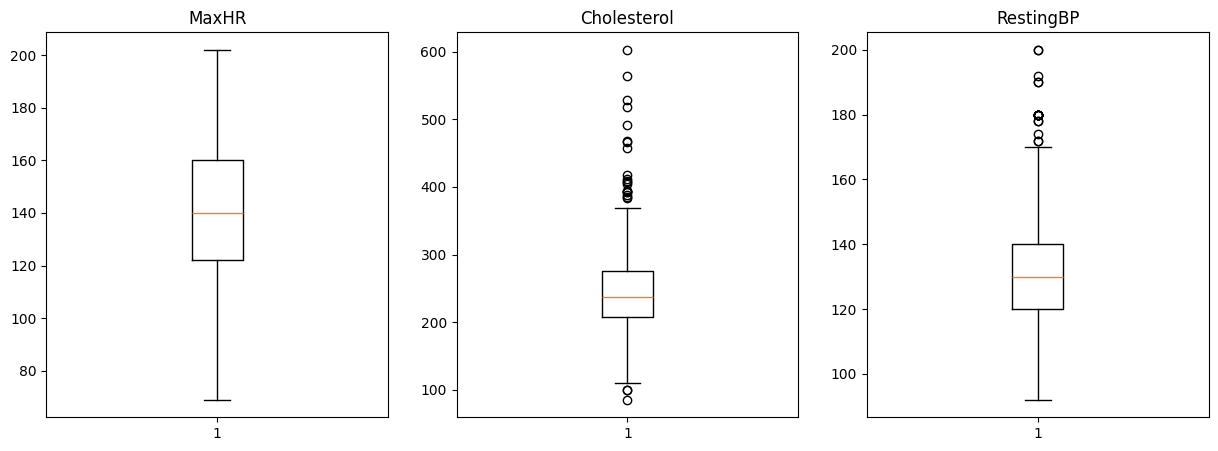

In [79]:
# Then create box plots with plt.boxplot()
fig, axes, = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(heart['MaxHR'])
axes[0].set_title('MaxHR')

axes[1].boxplot(heart['Cholesterol'])
axes[1].set_title('Cholesterol')

axes[2].boxplot(heart['RestingBP'])
axes[2].set_title('RestingBP')

### Step 8: Scale the numerical features

Apply Min-Max scaling to the numerical columns (not the target column).

In [80]:
from sklearn.preprocessing import MinMaxScaler

num_cols_to_scale = ['Age', 'MaxHR', 'Cholesterol', 'RestingBP']

heart_scaled = heart.copy()
scaler = MinMaxScaler()
heart_scaled[num_cols_to_scale] = scaler.fit_transform(heart_scaled[num_cols_to_scale])

heart_scaled.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0,0.444444,0.393822,0,0.774436,0,0.0,0,True,False,False,True,False,False,True
1,0.428571,1,0.629630,0.183398,0,0.654135,0,1.0,1,False,True,False,True,False,True,False
2,0.183673,0,0.351852,0.382239,0,0.218045,0,0.0,0,True,False,False,False,True,False,True
3,0.408163,1,0.425926,0.249035,0,0.293233,1,1.5,1,False,False,False,True,False,True,False
4,0.530612,0,0.537037,0.212355,0,0.398496,0,0.0,0,False,True,False,True,False,False,True


### Reflection Questions

After completing the exercise, answer these questions (add a text cell or answer here):

1. How did the Heart Disease dataset compare to the Titanic dataset in terms of data quality?
- The data quality was quite good but it was harder to detect the NANs as they were not labelled as NANs directly but rather a little hidden behind domain knowledge (though it was more fun as it was a little challenge to find them)
2. Which missing value strategy did you use, and why?
- I just dropped the rows with no cholesterol or no restingbp as they were not a huge part of the dataset
3. Did you find any outliers? Did you remove them? Why or why not?
- There were some outliers in the Cholesterol and in the RestingBP columns but I did not remove them because they might be indicators for a disease as people with diseases could potentially have spikes in those columns
4. If you were building a model to predict heart disease, which columns do you think would be most important?
- I think most important would be Age, Cholesterol, RestingBP as well as the blood pressure but I am pretty sure that almost all of the columns are very important, especially in combination with each other

---
*Great work! You now have hands-on experience with a complete data cleaning pipeline.* Dr. Thompson